In [67]:
import json
import pandas as pd

# Load data from experiment_ablation_judgements_clean.json into dataframe
with open('experiment_ablation_judgements_clean.json', 'r') as f:
    data = json.load(f)

df = pd.DataFrame(data)
df.head()


,file_path,adherence,coherence,shown_count,unique,model,dataset,experiment,variance,similarity_to_original
0,generated/experiment_ablation/google/gemma-3-4...,42,39,50,22,google/gemma-3-4b-it,alike,soft prompt,0.665769,0.594231
1,generated/experiment_ablation/google/gemma-3-4...,49,49,50,7,google/gemma-3-4b-it,alike,like history,0.463469,0.581061
2,generated/experiment_ablation/google/gemma-3-4...,40,34,50,0,google/gemma-3-4b-it,alike,self defined,0.187865,0.666518
3,generated/experiment_ablation/google/gemma-3-4...,31,24,50,0,google/gemma-3-4b-it,alike,summary,0.175414,0.526330
4,generated/experiment_ablation/google/gemma-3-4...,1,1,50,0,google/gemma-3-4b-it,college,summary,0.097586,0.361000


In [68]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


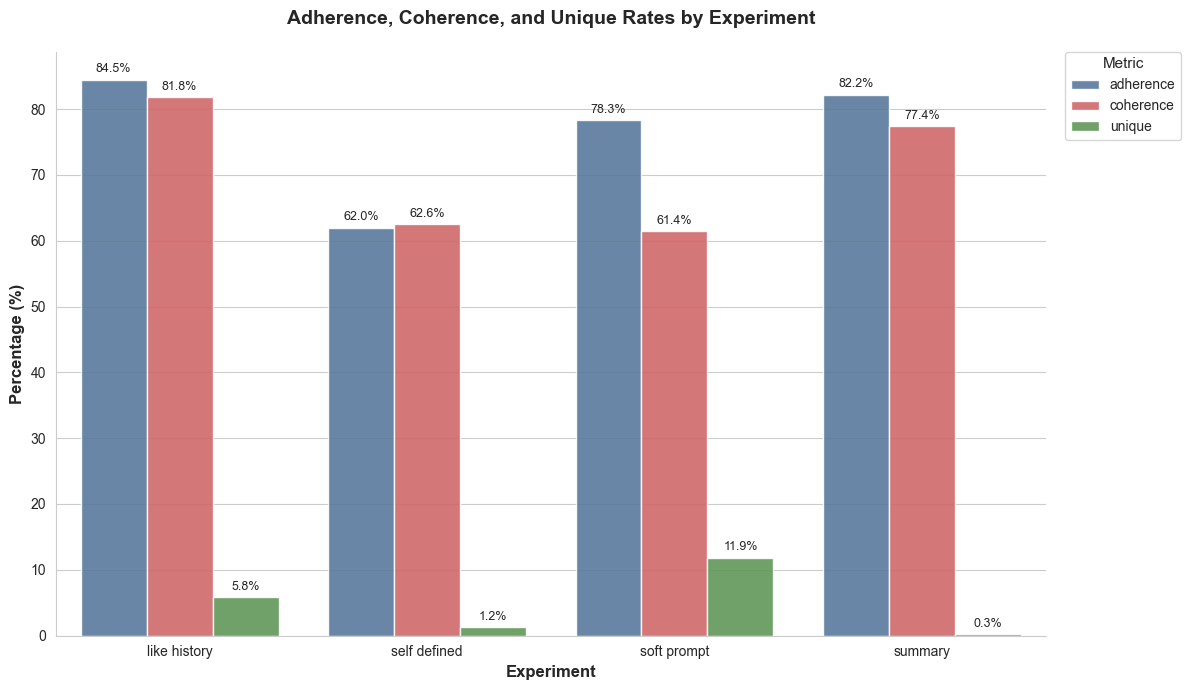

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Create visuals directory if it doesn't exist
os.makedirs('./visuals', exist_ok=True)

# Set seaborn style
sns.set_style("whitegrid")
sns.set_context('talk', font_scale=1.1)
plt.rcParams['figure.facecolor'] = 'white'

# Consistent colors for metrics (high-contrast, Tableau 10 inspired)
metric_palette = {
    'adherence': '#4E79A7',  # blue
    'coherence': '#E15759',  # red
    'unique': '#59A14F'      # green
}
metric_order_acu = ['adherence', 'coherence', 'unique']

# Group by experiment and calculate mean values for the metrics
grouped = df.groupby('experiment').agg({
    'adherence': 'mean',
    'coherence': 'mean', 
    'unique': 'mean'
}).reset_index()

# Convert to percentages by dividing by 50
grouped['adherence'] = grouped['adherence'] / 50 * 100
grouped['coherence'] = grouped['coherence'] / 50 * 100
grouped['unique'] = grouped['unique'] / 50 * 100

# Melt the dataframe for easier plotting with seaborn
melted = grouped.melt(id_vars=['experiment'], 
                     value_vars=metric_order_acu,
                     var_name='metric', value_name='percentage')

# Create the bar plot
plt.figure(figsize=(12, 7))
ax = sns.barplot(
    data=melted,
    x='experiment',
    y='percentage',
    hue='metric',
    hue_order=metric_order_acu,
    palette=metric_palette,
    alpha=0.9
)

# Customize the chart
ax.set_xlabel('Experiment', fontsize=12, fontweight='bold')
ax.set_ylabel('Percentage (%)', fontsize=12, fontweight='bold')
ax.set_title('Adherence, Coherence, and Unique Rates by Experiment', 
             fontsize=14, fontweight='bold', pad=20)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, ha='center')

# Customize legend outside plot to avoid overlap
legend = ax.legend(
    title='Metric',
    title_fontsize=11,
    fontsize=10,
    loc='upper left',
    bbox_to_anchor=(1.02, 1.0),
    borderaxespad=0
)

# Add value labels on top of bars with percentage symbol
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', fontsize=9, padding=3)

# Remove top and right spines for cleaner look
sns.despine()

plt.tight_layout()

# Save the plot
plt.savefig('./visuals/acu-rates.png', dpi=300, bbox_inches='tight')
plt.show()



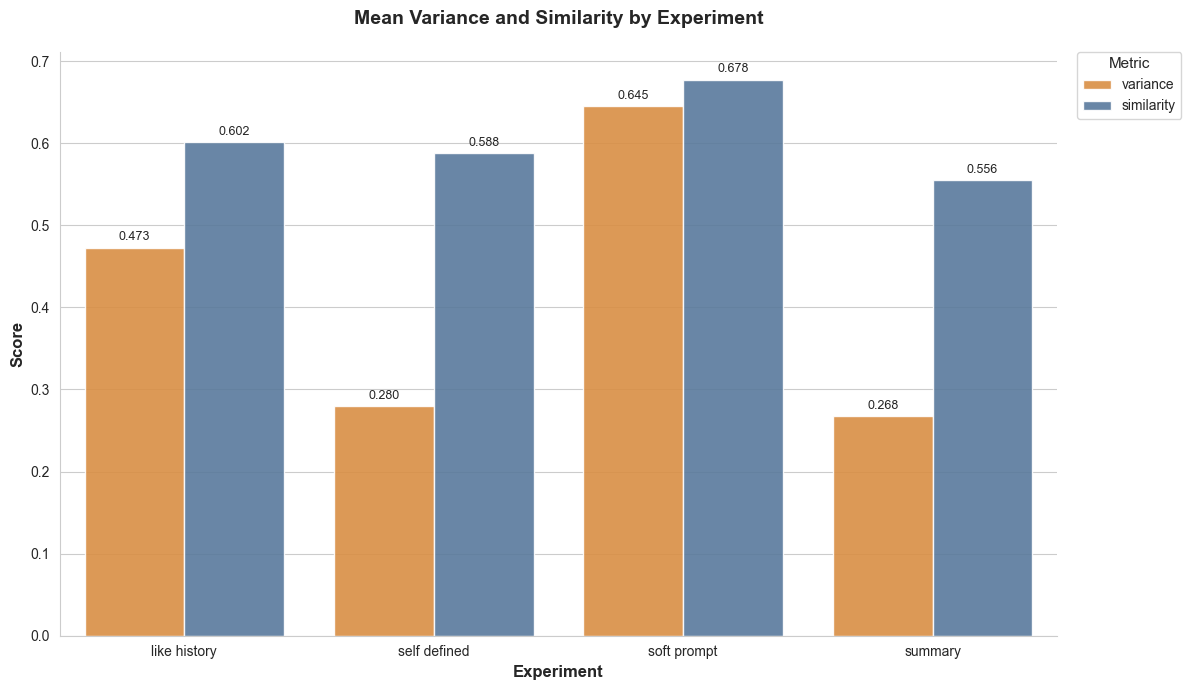

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Create visuals directory if it doesn't exist
os.makedirs('./visuals', exist_ok=True)

# Set seaborn style
sns.set_style("whitegrid")
plt.rcParams['figure.facecolor'] = 'white'

# Consistent colors for variance/similarity (high-contrast)
vs_palette = {
    'variance': '#F28E2B',   # orange
    'similarity': '#4E79A7'  # blue
}
vs_order = ['variance', 'similarity']

# Group by experiment and calculate mean values for variance and similarity
grouped = df.groupby('experiment').agg({
    'variance': 'mean',
    'similarity_to_original': 'mean'
}).reset_index()

# Melt the dataframe for easier plotting with seaborn
melted = grouped.melt(
    id_vars=['experiment'],
    value_vars=['variance', 'similarity_to_original'],
    var_name='metric',
    value_name='value'
)

# Rename similarity label for display consistency
melted['metric'] = melted['metric'].replace({'similarity_to_original': 'similarity'})

# Create the bar plot
plt.figure(figsize=(12, 7))
ax = sns.barplot(
    data=melted,
    x='experiment',
    y='value',
    hue='metric',
    hue_order=vs_order,
    palette=vs_palette,
    alpha=0.9
)

# Customize the chart
ax.set_xlabel('Experiment', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Mean Variance and Similarity by Experiment', 
             fontsize=14, fontweight='bold', pad=20)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, ha='center')

# Customize legend outside plot to avoid overlap
legend = ax.legend(
    title='Metric',
    title_fontsize=11,
    fontsize=10,
    loc='upper left',
    bbox_to_anchor=(1.02, 1.0),
    borderaxespad=0
)

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', fontsize=9, padding=3)

# Remove top and right spines for cleaner look
sns.despine()

plt.tight_layout()

# Save the plot
plt.savefig('./visuals/variance-similarity.png', dpi=300, bbox_inches='tight')
plt.show()


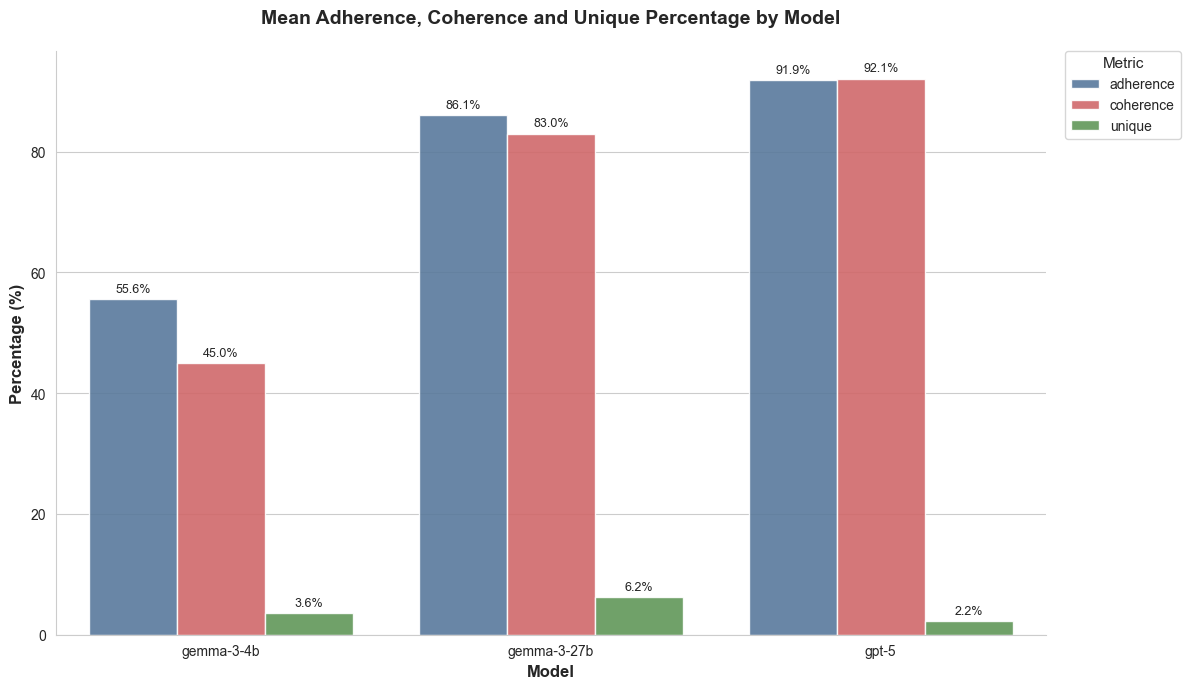

In [71]:
# Group by model and calculate mean values for adherence and coherence
grouped_model = df.groupby('model').agg({
    'adherence': 'mean',
    'coherence': 'mean',
    'unique': 'mean'
}).reset_index()

# Convert to percentages
grouped_model['adherence'] = grouped_model['adherence'] / 50 * 100
grouped_model['coherence'] = grouped_model['coherence'] / 50 * 100
grouped_model['unique'] = grouped_model['unique'] / 50 * 100

# Map model names to simplified labels for display
model_label_map = {
    'google/gemma-3-4b-it': 'gemma-3-4b',
    'google/gemma-3-27b-it': 'gemma-3-27b',
    'openai/gpt-5': 'gpt-5'
}
grouped_model['model_label'] = grouped_model['model'].replace(model_label_map)

# Define display order for simplified labels
model_label_order = ['gemma-3-4b', 'gemma-3-27b', 'gpt-5']

# Consistent colors for metrics (high-contrast)
metric_palette = {
    'adherence': '#4E79A7',  # blue
    'coherence': '#E15759',  # red
    'unique': '#59A14F'      # green
}
metric_order_acu = ['adherence', 'coherence', 'unique']

# Melt the dataframe for easier plotting with seaborn
melted_model = grouped_model.melt(
    id_vars=['model_label'],
    value_vars=metric_order_acu,
    var_name='metric',
    value_name='value'
)

# Create the bar plot
plt.figure(figsize=(12, 7))
ax = sns.barplot(
    data=melted_model,
    x='model_label',
    y='value',
    hue='metric',
    hue_order=metric_order_acu,
    palette=metric_palette,
    alpha=0.9,
    order=model_label_order
)

# Customize the chart
ax.set_xlabel('Model', fontsize=12, fontweight='bold')
ax.set_ylabel('Percentage (%)', fontsize=12, fontweight='bold')
ax.set_title('Mean Adherence, Coherence and Unique Percentage by Model', 
             fontsize=14, fontweight='bold', pad=20)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, ha='center')

# Customize legend outside plot to avoid overlap
legend = ax.legend(
    title='Metric',
    title_fontsize=11,
    fontsize=10,
    loc='upper left',
    bbox_to_anchor=(1.02, 1.0),
    borderaxespad=0
)

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', fontsize=9, padding=3)

# Remove top and right spines for cleaner look
sns.despine()

plt.tight_layout()

# Save the plot
plt.savefig('./visuals/model-adherence-coherence-unique.png', dpi=300, bbox_inches='tight')
plt.show()



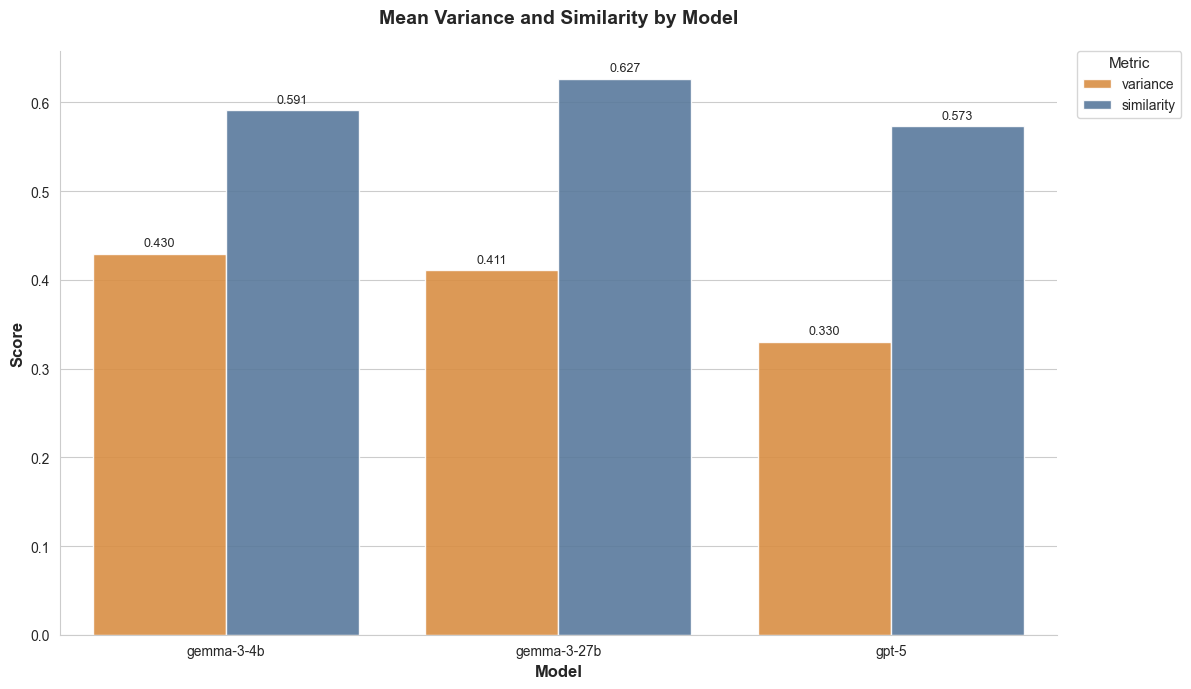

In [72]:
# Group by model and calculate mean values for variance and similarity
grouped_model_vs = df.groupby('model').agg({
    'variance': 'mean',
    'similarity_to_original': 'mean'
}).reset_index()

# Map model names to simplified labels for display
model_label_map = {
    'google/gemma-3-4b-it': 'gemma-3-4b',
    'google/gemma-3-27b-it': 'gemma-3-27b',
    'openai/gpt-5': 'gpt-5'
}
grouped_model_vs['model_label'] = grouped_model_vs['model'].replace(model_label_map)

# Consistent colors for variance/similarity (high-contrast)
vs_palette = {
    'variance': '#F28E2B',   # orange
    'similarity': '#4E79A7'  # blue
}
vs_order = ['variance', 'similarity']

# Melt the dataframe for easier plotting with seaborn
melted_model_vs = grouped_model_vs.melt(
    id_vars=['model_label'],
    value_vars=['variance', 'similarity_to_original'],
    var_name='metric',
    value_name='value'
)

# Rename similarity label for display consistency
melted_model_vs['metric'] = melted_model_vs['metric'].replace({'similarity_to_original': 'similarity'})

# Create the bar plot
plt.figure(figsize=(12, 7))
ax = sns.barplot(
    data=melted_model_vs,
    x='model_label',
    y='value',
    hue='metric',
    hue_order=vs_order,
    palette=vs_palette,
    alpha=0.9,
    order=['gemma-3-4b', 'gemma-3-27b', 'gpt-5']
)

# Customize the chart
ax.set_xlabel('Model', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Mean Variance and Similarity by Model', 
             fontsize=14, fontweight='bold', pad=20)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, ha='center')

# Customize legend outside plot to avoid overlap
legend = ax.legend(
    title='Metric',
    title_fontsize=11,
    fontsize=10,
    loc='upper left',
    bbox_to_anchor=(1.02, 1.0),
    borderaxespad=0
)

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', fontsize=9, padding=3)

# Remove top and right spines for cleaner look
sns.despine()

plt.tight_layout()

# Save the plot
plt.savefig('./visuals/model-variance-similarity.png', dpi=300, bbox_inches='tight')
plt.show()




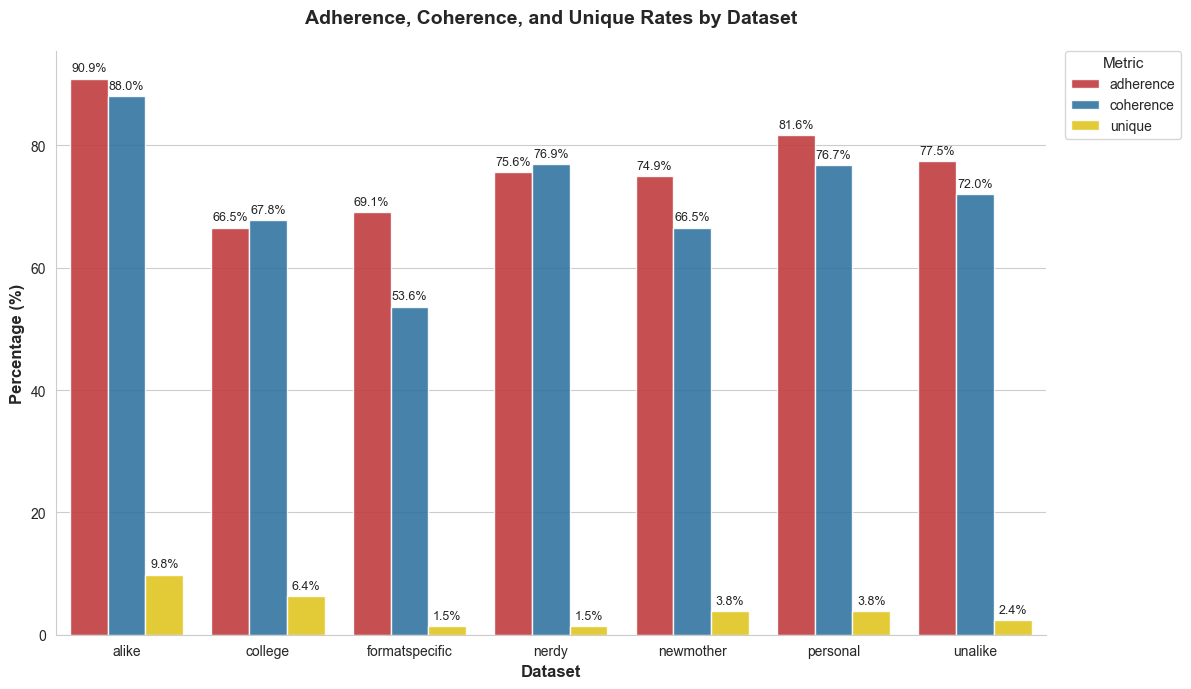

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Create visuals directory if it doesn't exist
os.makedirs('./visuals', exist_ok=True)

# Set seaborn style
sns.set_style("whitegrid")
plt.rcParams['figure.facecolor'] = 'white'

# Consistent colors for metrics
metric_palette = {
    'adherence': '#d62728',  # red
    'coherence': '#1f77b4',  # blue
    'unique': '#ffdd00'      # yellow
}
metric_order_acu = ['adherence', 'coherence', 'unique']

# Group by dataset and calculate mean values for the metrics
grouped_ds = df.groupby('dataset').agg({
    'adherence': 'mean',
    'coherence': 'mean',
    'unique': 'mean'
}).reset_index()

# Convert to percentages by dividing by 50
grouped_ds['adherence'] = grouped_ds['adherence'] / 50 * 100
grouped_ds['coherence'] = grouped_ds['coherence'] / 50 * 100
grouped_ds['unique'] = grouped_ds['unique'] / 50 * 100

# Melt the dataframe for easier plotting with seaborn
melted_ds = grouped_ds.melt(
    id_vars=['dataset'],
    value_vars=metric_order_acu,
    var_name='metric',
    value_name='percentage'
)

# Create the bar plot
plt.figure(figsize=(12, 7))
ax = sns.barplot(
    data=melted_ds,
    x='dataset',
    y='percentage',
    hue='metric',
    hue_order=metric_order_acu,
    palette=metric_palette,
    alpha=0.9
)

# Customize the chart
ax.set_xlabel('Dataset', fontsize=12, fontweight='bold')
ax.set_ylabel('Percentage (%)', fontsize=12, fontweight='bold')
ax.set_title('Adherence, Coherence, and Unique Rates by Dataset', 
             fontsize=14, fontweight='bold', pad=20)

# Horizontal x-axis labels
plt.xticks(rotation=0, ha='center')

# Customize legend outside plot to avoid overlap
legend = ax.legend(
    title='Metric',
    title_fontsize=11,
    fontsize=10,
    loc='upper left',
    bbox_to_anchor=(1.02, 1.0),
    borderaxespad=0
)

# Add value labels on top of bars with percentage symbol
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', fontsize=9, padding=3)

# Remove top and right spines for cleaner look
sns.despine()

plt.tight_layout()

# Save the plot
plt.savefig('./visuals/dataset-acu-rates.png', dpi=300, bbox_inches='tight')
plt.show()


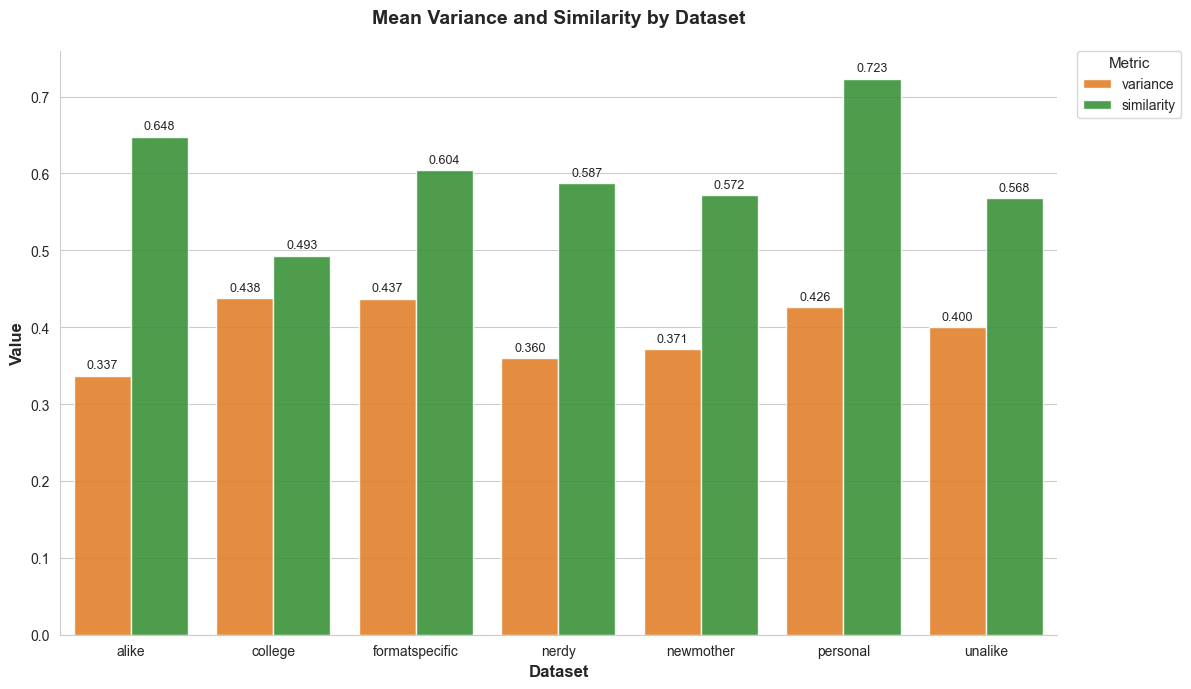

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Create visuals directory if it doesn't exist
os.makedirs('./visuals', exist_ok=True)

# Set seaborn style
sns.set_style("whitegrid")
plt.rcParams['figure.facecolor'] = 'white'

# Consistent colors for variance/similarity
vs_palette = {
    'variance': '#ff7f0e',   # orange
    'similarity': '#2ca02c'  # green
}
vs_order = ['variance', 'similarity']

# Group by dataset and calculate mean values for variance and similarity
grouped_ds_vs = df.groupby('dataset').agg({
    'variance': 'mean',
    'similarity_to_original': 'mean'
}).reset_index()

# Melt the dataframe for easier plotting with seaborn
melted_ds_vs = grouped_ds_vs.melt(
    id_vars=['dataset'],
    value_vars=['variance', 'similarity_to_original'],
    var_name='metric',
    value_name='value'
)

# Rename similarity label for display consistency
melted_ds_vs['metric'] = melted_ds_vs['metric'].replace({'similarity_to_original': 'similarity'})

# Create the bar plot
plt.figure(figsize=(12, 7))
ax = sns.barplot(
    data=melted_ds_vs,
    x='dataset',
    y='value',
    hue='metric',
    hue_order=vs_order,
    palette=vs_palette,
    alpha=0.9
)

# Customize the chart
ax.set_xlabel('Dataset', fontsize=12, fontweight='bold')
ax.set_ylabel('Value', fontsize=12, fontweight='bold')
ax.set_title('Mean Variance and Similarity by Dataset', 
             fontsize=14, fontweight='bold', pad=20)

# Horizontal x-axis labels
plt.xticks(rotation=0, ha='center')

# Customize legend outside plot to avoid overlap
legend = ax.legend(
    title='Metric',
    title_fontsize=11,
    fontsize=10,
    loc='upper left',
    bbox_to_anchor=(1.02, 1.0),
    borderaxespad=0
)

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', fontsize=9, padding=3)

# Remove top and right spines for cleaner look
sns.despine()

plt.tight_layout()

# Save the plot
plt.savefig('./visuals/dataset-variance-similarity.png', dpi=300, bbox_inches='tight')
plt.show()


In [75]:
# Create pivot tables for each metric, separated by model
datasets_of_interest = ['nerdy', 'personal', 'unalike', 'alike', 'formatspecific', 'college', 'newmother']
experiments_of_interest = ['soft prompt', 'self defined', 'summary', 'like history']

# Filter data for the datasets and experiments of interest
filtered_df = df[
    (df['dataset'].isin(datasets_of_interest)) & 
    (df['experiment'].isin(experiments_of_interest))
]

# Get unique models
models = filtered_df['model'].unique()

# Create pivot tables for each model and metric
for model in models:
    model_data = filtered_df[filtered_df['model'] == model]
    
    # Create adherence pivot table (convert to percentage)
    adherence_pivot = model_data.pivot_table(
        values='adherence', 
        index='dataset', 
        columns='experiment', 
        aggfunc='mean'
    ) / 50 * 100  # Convert to percentage
    
    # Create coherence pivot table (convert to percentage)
    coherence_pivot = model_data.pivot_table(
        values='coherence', 
        index='dataset', 
        columns='experiment', 
        aggfunc='mean'
    ) / 50 * 100  # Convert to percentage
    
    # Create unique pivot table (convert to percentage)
    unique_pivot = model_data.pivot_table(
        values='unique', 
        index='dataset', 
        columns='experiment', 
        aggfunc='mean'
    ) / 50 * 100  # Convert to percentage
    
    # Reorder columns to match the desired order
    column_order = ['soft prompt', 'self defined', 'summary', 'like history']
    adherence_pivot = adherence_pivot.reindex(columns=column_order)
    coherence_pivot = coherence_pivot.reindex(columns=column_order)
    unique_pivot = unique_pivot.reindex(columns=column_order)
    
    # Reorder rows to match the desired order
    row_order = ['nerdy', 'personal', 'unalike', 'alike', 'formatspecific', 'college', 'newmother']
    adherence_pivot = adherence_pivot.reindex(index=row_order)
    coherence_pivot = coherence_pivot.reindex(index=row_order)
    unique_pivot = unique_pivot.reindex(index=row_order)
    
    print(f"\n{'='*60}")
    print(f"MODEL: {model}")
    print(f"{'='*60}")
    
    # Print LaTeX tables
    print(f"\nAdherence Percentage ({model}) - LaTeX:")
    print("\\begin{table}[h]")
    print("\\centering")
    print(f"\\caption{{Adherence Percentage for {model.replace('/', '-')}}}")
    print("\\begin{tabular}{|l|c|c|c|c|}")
    print("\\hline")
    print("\\textbf{Dataset} & \\textbf{Soft Prompt} & \\textbf{Self Defined} & \\textbf{Summary} & \\textbf{Like History} \\\\")
    print("\\hline")
    for idx, row in adherence_pivot.iterrows():
        formatted_row = [f"{val:.1f}" if not pd.isna(val) else "-" for val in row]
        print(f"{idx} & {' & '.join(formatted_row)} \\\\")
        print("\\hline")
    print("\\end{tabular}")
    print("\\end{table}")
    
    print(f"\nCoherence Percentage ({model}) - LaTeX:")
    print("\\begin{table}[h]")
    print("\\centering")
    print(f"\\caption{{Coherence Percentage for {model.replace('/', '-')}}}")
    print("\\begin{tabular}{|l|c|c|c|c|}")
    print("\\hline")
    print("\\textbf{Dataset} & \\textbf{Soft Prompt} & \\textbf{Self Defined} & \\textbf{Summary} & \\textbf{Like History} \\\\")
    print("\\hline")
    for idx, row in coherence_pivot.iterrows():
        formatted_row = [f"{val:.1f}" if not pd.isna(val) else "-" for val in row]
        print(f"{idx} & {' & '.join(formatted_row)} \\\\")
        print("\\hline")
    print("\\end{tabular}")
    print("\\end{table}")
    
    print(f"\nUnique Percentage ({model}) - LaTeX:")
    print("\\begin{table}[h]")
    print("\\centering")
    print(f"\\caption{{Unique Percentage for {model.replace('/', '-')}}}")
    print("\\begin{tabular}{|l|c|c|c|c|}")
    print("\\hline")
    print("\\textbf{Dataset} & \\textbf{Soft Prompt} & \\textbf{Self Defined} & \\textbf{Summary} & \\textbf{Like History} \\\\")
    print("\\hline")
    for idx, row in unique_pivot.iterrows():
        formatted_row = [f"{val:.1f}" if not pd.isna(val) else "-" for val in row]
        print(f"{idx} & {' & '.join(formatted_row)} \\\\")
        print("\\hline")
    print("\\end{tabular}")
    print("\\end{table}")





MODEL: google/gemma-3-4b-it

Adherence Percentage (google/gemma-3-4b-it) - LaTeX:
\begin{table}[h]
\centering
\caption{Adherence Percentage for google-gemma-3-4b-it}
\begin{tabular}{|l|c|c|c|c|}
\hline
\textbf{Dataset} & \textbf{Soft Prompt} & \textbf{Self Defined} & \textbf{Summary} & \textbf{Like History} \\
\hline
nerdy & 88.0 & 2.0 & 26.0 & 90.0 \\
\hline
personal & 74.0 & 48.0 & 52.0 & 42.0 \\
\hline
unalike & 82.0 & 2.0 & 96.0 & 32.0 \\
\hline
alike & 84.0 & 80.0 & 62.0 & 98.0 \\
\hline
formatspecific & 76.0 & 42.0 & 98.0 & 50.0 \\
\hline
college & 78.0 & 0.0 & 2.0 & 64.0 \\
\hline
newmother & 54.0 & 4.0 & 64.0 & 68.0 \\
\hline
\end{tabular}
\end{table}

Coherence Percentage (google/gemma-3-4b-it) - LaTeX:
\begin{table}[h]
\centering
\caption{Coherence Percentage for google-gemma-3-4b-it}
\begin{tabular}{|l|c|c|c|c|}
\hline
\textbf{Dataset} & \textbf{Soft Prompt} & \textbf{Self Defined} & \textbf{Summary} & \textbf{Like History} \\
\hline
nerdy & 70.0 & 0.0 & 64.0 & 78.0 \\
\hli

In [76]:
# Create variance tables for each model
for model in models:
    model_data = df[df['model'] == model]
    
    # Create pivot tables for variance
    variance_pivot = model_data.pivot(index='dataset', columns='experiment', values='variance')
    
    # Reorder columns to match the format
    column_order = ['soft prompt', 'self defined', 'summary', 'like history']
    variance_pivot = variance_pivot.reindex(columns=column_order)
    
    print(f"\nVariance Table for {model.replace('/', '-')} - LaTeX:")
    print("\\begin{table}[H]")
    print("\\centering")
    print(f"\\caption{{Variance for {model.replace('/', '-')}}}")
    print("\\begin{tabular}{|l|c|c|c|c|}")
    print("\\hline")
    print("\\textbf{Dataset} & \\textbf{Soft Prompt} & \\textbf{Self Defined} & \\textbf{Summary} & \\textbf{Like History} \\\\")
    print("\\hline")
    
    for idx, row in variance_pivot.iterrows():
        formatted_row = [f"{val:.3f}" if not pd.isna(val) else "-" for val in row]
        print(f"{idx} & {' & '.join(formatted_row)} \\\\")
        print("\\hline")
    print("\\end{tabular}")
    print("\\end{table}")

print("\n" + "="*80 + "\n")

# Create similarity tables for each model
for model in models:
    model_data = df[df['model'] == model]
    
    # Create pivot tables for similarity
    similarity_pivot = model_data.pivot(index='dataset', columns='experiment', values='similarity_to_original')
    
    # Reorder columns to match the format
    column_order = ['soft prompt', 'self defined', 'summary', 'like history']
    similarity_pivot = similarity_pivot.reindex(columns=column_order)
    
    print(f"\nSimilarity to Original Table for {model.replace('/', '-')} - LaTeX:")
    print("\\begin{table}[H]")
    print("\\centering")
    print(f"\\caption{{Similarity to Original for {model.replace('/', '-')}}}")
    print("\\begin{tabular}{|l|c|c|c|c|}")
    print("\\hline")
    print("\\textbf{Dataset} & \\textbf{Soft Prompt} & \\textbf{Self Defined} & \\textbf{Summary} & \\textbf{Like History} \\\\")
    print("\\hline")
    
    for idx, row in similarity_pivot.iterrows():
        formatted_row = [f"{val:.3f}" if not pd.isna(val) else "-" for val in row]
        print(f"{idx} & {' & '.join(formatted_row)} \\\\")
        print("\\hline")
    print("\\end{tabular}")
    print("\\end{table}")




Variance Table for google-gemma-3-4b-it - LaTeX:
\begin{table}[H]
\centering
\caption{Variance for google-gemma-3-4b-it}
\begin{tabular}{|l|c|c|c|c|}
\hline
\textbf{Dataset} & \textbf{Soft Prompt} & \textbf{Self Defined} & \textbf{Summary} & \textbf{Like History} \\
\hline
alike & 0.666 & 0.188 & 0.175 & 0.463 \\
\hline
college & 0.700 & 0.310 & 0.098 & 0.703 \\
\hline
formatspecific & 0.673 & 0.269 & 0.250 & 0.630 \\
\hline
nerdy & 0.581 & 0.145 & 0.377 & 0.373 \\
\hline
newmother & 0.574 & 0.255 & 0.306 & 0.632 \\
\hline
personal & 0.590 & 0.632 & 0.391 & 0.538 \\
\hline
unalike & 0.702 & 0.080 & 0.108 & 0.623 \\
\hline
\end{tabular}
\end{table}

Variance Table for google-gemma-3-27b-it - LaTeX:
\begin{table}[H]
\centering
\caption{Variance for google-gemma-3-27b-it}
\begin{tabular}{|l|c|c|c|c|}
\hline
\textbf{Dataset} & \textbf{Soft Prompt} & \textbf{Self Defined} & \textbf{Summary} & \textbf{Like History} \\
\hline
alike & 0.633 & 0.269 & 0.217 & 0.587 \\
\hline
college & 0.721 & 

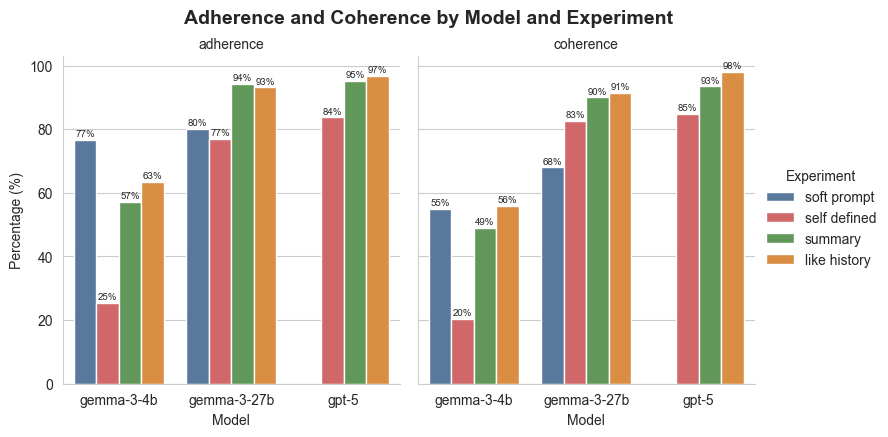

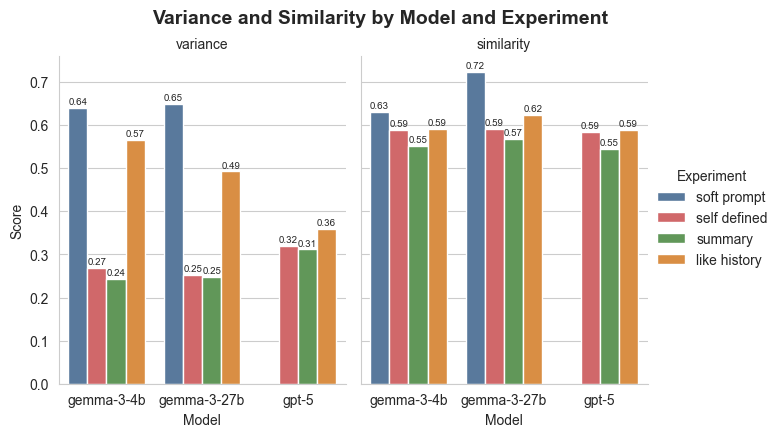

In [92]:
# FIX: ACU and Variance/Similarity by Model, split by Experiment (swapped hue/x)
import seaborn as sns
import matplotlib.pyplot as plt

# Reuse orders; define experiment palette for colors
experiment_order = ['soft prompt', 'self defined', 'summary', 'like history']
model_order = ['gemma-3-4b', 'gemma-3-27b', 'gpt-5']
# High-contrast palette for experiments (Tableau 10 inspired)
exp_palette = {
    'soft prompt': '#4E79A7',    # blue
    'self defined': '#E15759',   # red
    'summary': '#59A14F',        # green
    'like history': '#F28E2B'    # orange
}

# ACU
metric_order_acu = ['adherence', 'coherence']
acu_grouped = (
    df.groupby(['experiment', 'model'])
      .agg({'adherence': 'mean', 'coherence': 'mean', 'unique': 'mean'})
      .reset_index()
)
# Map to display labels
model_label_map = {
    'google/gemma-3-4b-it': 'gemma-3-4b',
    'google/gemma-3-27b-it': 'gemma-3-27b',
    'openai/gpt-5': 'gpt-5'
}
acu_grouped['model'] = acu_grouped['model'].replace(model_label_map)
for m in metric_order_acu:
    acu_grouped[m] = acu_grouped[m] / 50 * 100
acu_melted = acu_grouped.melt(
    id_vars=['experiment', 'model'],
    value_vars=metric_order_acu,
    var_name='metric',
    value_name='value'
)
acu_grid = sns.catplot(
    data=acu_melted,
    kind='bar',
    x='model', y='value',
    hue='experiment', col='metric',
    hue_order=experiment_order,
    col_order=metric_order_acu,
    order=model_order,
    palette=exp_palette,
    height=4.2, aspect=0.8,
    legend=True
)
acu_grid.set_axis_labels('Model', 'Percentage (%)')
acu_grid.set_titles('{col_name}')
for ax in acu_grid.axes.flat:
    for c in ax.containers:
        ax.bar_label(c, fmt='%.0f%%', fontsize=7, padding=1)
    ax.tick_params(axis='x', rotation=0)
    sns.despine(ax=ax)
# Place legend inside plot area for better layout
if acu_grid._legend is not None:
    acu_grid._legend.remove()
acu_grid.add_legend(title='Experiment', frameon=False)
acu_grid.fig.suptitle('Adherence and Coherence by Model and Experiment', fontsize=14, fontweight='bold', y=1.03)
acu_grid.savefig('./visuals/acu-by-model-experiment.png', dpi=300, bbox_inches='tight')
plt.show()

# Variance / Similarity
vs_grouped = (
    df.groupby(['experiment', 'model'])
      .agg({'variance': 'mean', 'similarity_to_original': 'mean'})
      .reset_index()
)
# Map to display labels
vs_grouped['model'] = vs_grouped['model'].replace(model_label_map)
vs_melted = vs_grouped.melt(
    id_vars=['experiment', 'model'],
    value_vars=['variance', 'similarity_to_original'],
    var_name='metric',
    value_name='value'
)
vs_melted['metric'] = vs_melted['metric'].replace({'similarity_to_original': 'similarity'})
vs_order = ['variance', 'similarity']
vs_grid = sns.catplot(
    data=vs_melted,
    kind='bar',
    x='model', y='value',
    hue='experiment', col='metric',
    hue_order=experiment_order,
    col_order=vs_order,
    order=model_order,
    palette=exp_palette,
    height=4.2, aspect=0.8,
    legend=True
)
vs_grid.set_axis_labels('Model', 'Score')
vs_grid.set_titles('{col_name}')
for ax in vs_grid.axes.flat:
    for c in ax.containers:
        ax.bar_label(c, fmt='%.2f', fontsize=7, padding=1)
    ax.tick_params(axis='x', rotation=0)
    sns.despine(ax=ax)
vs_grid._legend.set_title('Experiment')
vs_grid.fig.suptitle('Variance and Similarity by Model and Experiment', fontsize=14, fontweight='bold', y=1.03)
vs_grid.savefig('./visuals/variance-similarity-by-model-experiment.png', dpi=300, bbox_inches='tight')
plt.show()
